# 04 - Exploratory Data Analysis (EDA)
This notebook focuses on exploring the Netflix dataset to uncover patterns, trends, and distributions. We will answer questions like:

- What type of content does Netflix offer more?
- How has Netflix content changed over the years?
- What are the most common ratings, genres, and production countries?

### 1. Load the Cleaned Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/netflix_cleaned.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,minute,2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,season,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,season,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,season,2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,season,2021,9


### 2. Distribution of Content Types
We start by seeing how many entries are in movies and compare to TV shows.


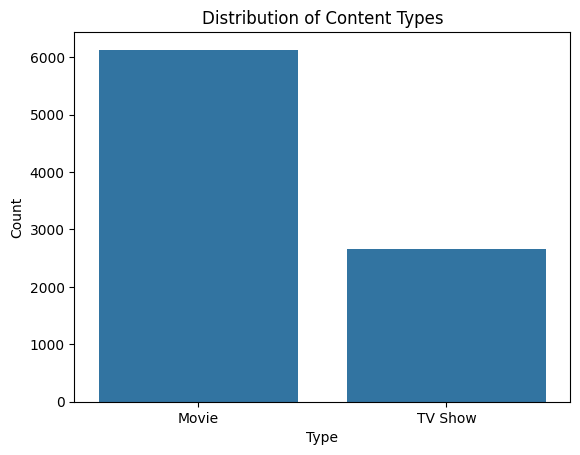

In [89]:
sns.countplot(x='type', data=df)
plt.title("Distribution of Content Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

### 3. Release Year Distributions
See how Netflix content changed over the years

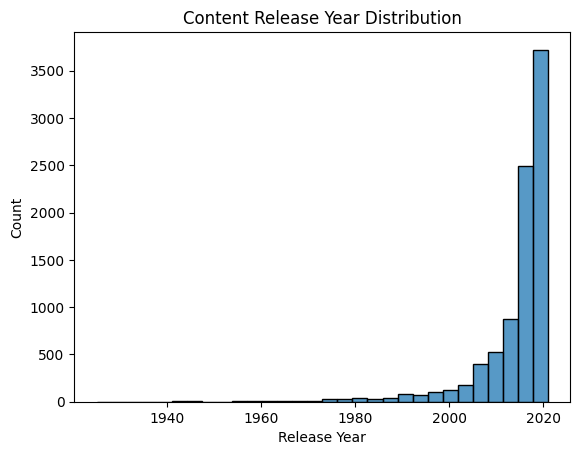

In [88]:
# Content release year
sns.histplot(df['release_year'], bins=30)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Content Release Year Distribution")
plt.show()

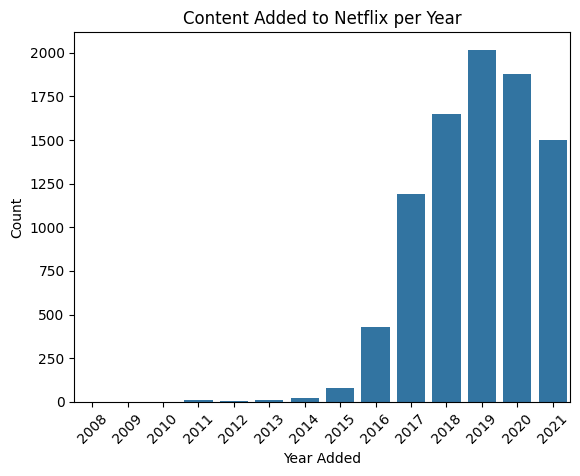

In [90]:
# Content added to Netflix
sns.countplot(x='year_added', data=df)
plt.xticks(rotation=45)
plt.title("Content Added to Netflix per Year")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()

### 4. Ratings Distribution 
We will see how content is distributed by rating.

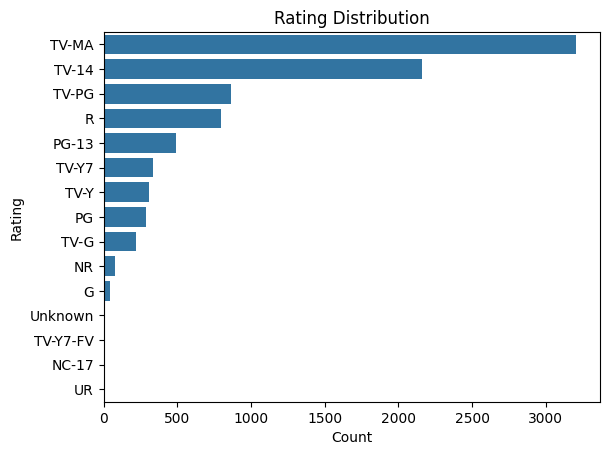

In [91]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Rating")
plt.title("Rating Distribution")
plt.show()

### 5. Top Producing Countries
Some rows contain multiple countries. We will normalize and then see the top 10.

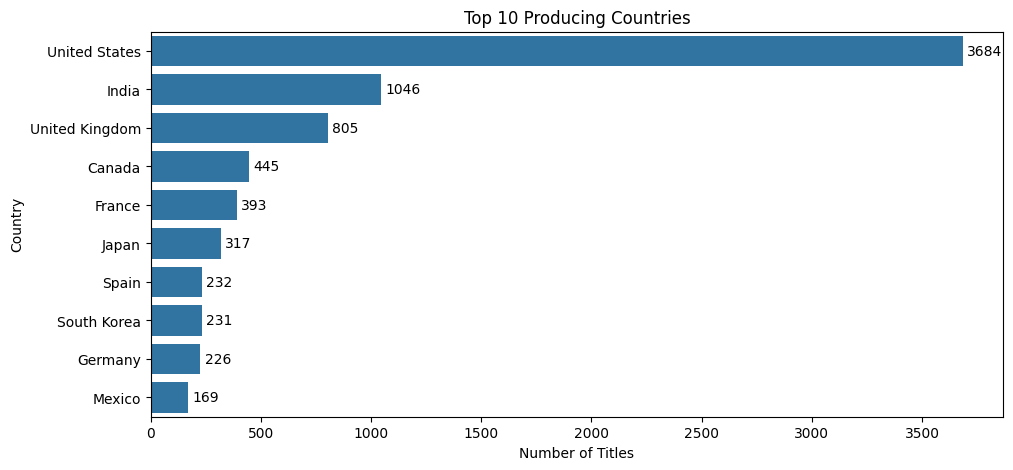

In [ ]:
# remove unknown and split entries with multiple countries
cleaned_country = df[df['country'] != 'Unknown'].copy()
cleaned_country['country'] = cleaned_country['country'].str.split(r',\s*')
explode_country = cleaned_country.explode('country')

top_countries = explode_country['country'].value_counts().head(10)

plt.figure(figsize=(11, 5))
sns.barplot(x=top_countries.values, y=top_countries.index)

# label bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title("Top 10 Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


### 6. Top Directors
Top 10 directors based on how many shows or movies they have directed.

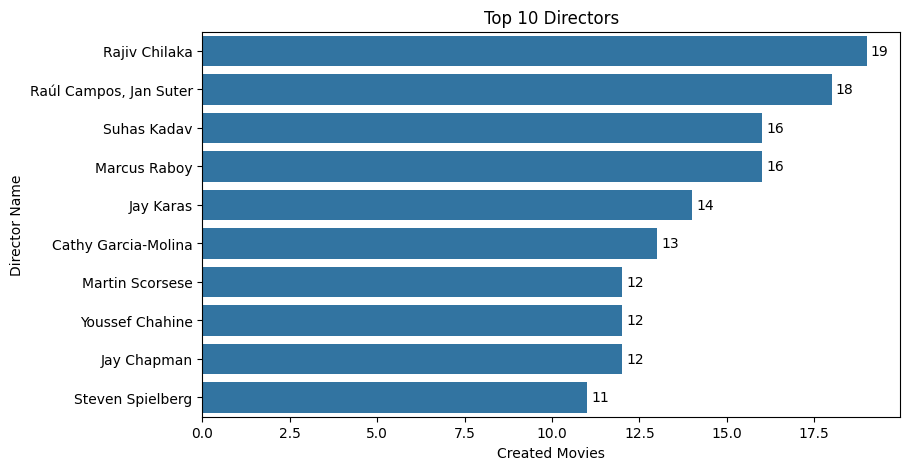

In [102]:
top_directors = df['director'][df['director'] != "Unknown"].value_counts().head(10)

plt.figure(figsize=(9, 5))
sns.barplot(x=top_directors.values, y=top_directors.index)

# label bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xlabel("Created Movies")
plt.ylabel("Director Name")
plt.title("Top 10 Directors")
plt.show()

###  7. Duration Distributions
We split the movies and TV shows to see the distributions in minutes and seasons.

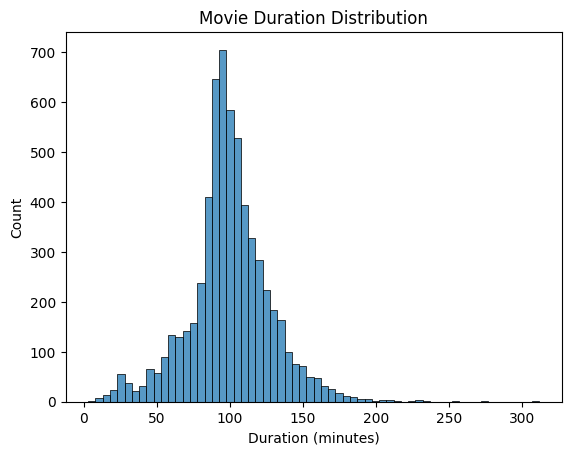

In [94]:
# Movie duration in minutes
sns.histplot(df[df["type"] == "Movie"]["duration_value"], binwidth=5)
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.title("Movie Duration Distribution")
plt.show()

Text(0, 0.5, 'Number of TV Shows')

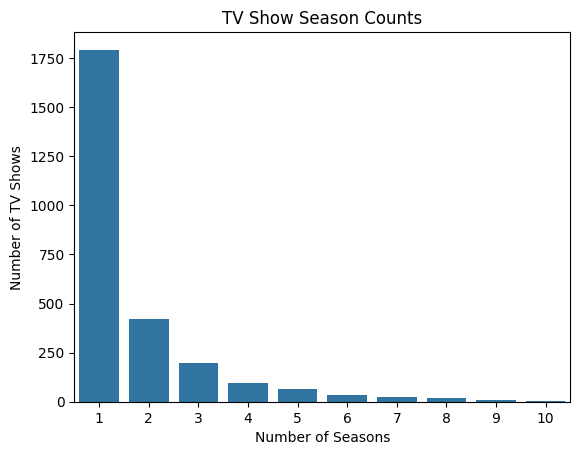

In [ ]:
tv_df = df[df["type"] == "TV Show"]
tv_df_limited = tv_df[tv_df["duration_value"] <= 10]

sns.countplot(x="duration_value", data=tv_df_limited)
plt.title("TV Show Season Counts (<= 10 Seasons)")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")
plt.show()

###  8. Top Genres (`listed_in`)
We will split the multiple genres entries to see which genres are most the popular.

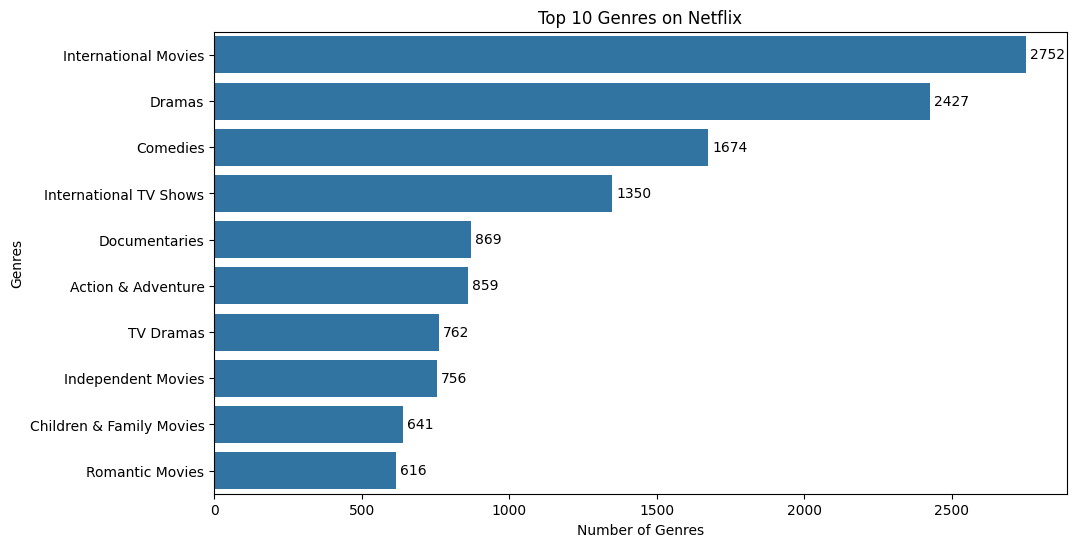

In [97]:
all_genres = df['listed_in'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(11, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)

# label bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xlabel("Number of Genres")
plt.ylabel("Genres")
plt.title("Top 10 Genres on Netflix")
plt.show()

### 9. Correlation Heatmap
Correlation between `release_year`, `duration_value`, `year_added`, `month_added`

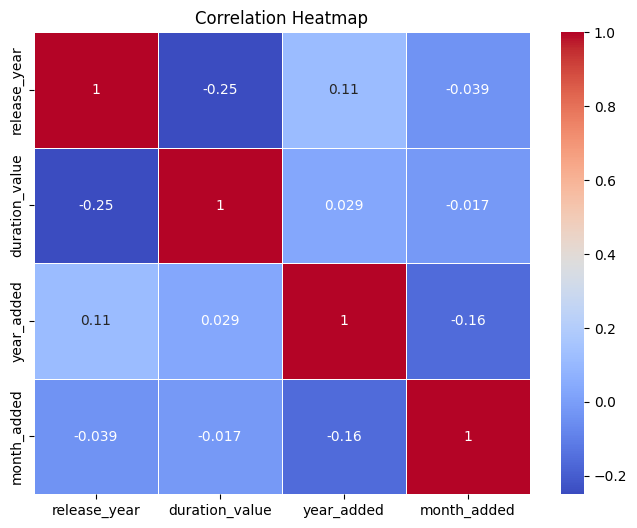

In [98]:
num_cols = df.select_dtypes(include='number')
correlation_matrix = num_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### 10. Pairwise Scatterplots
Scatterplot matrix to visualize the relationships between `release_year`, `duration_value`, `year_added`, `month_added`, grouped by movies and TV shows .

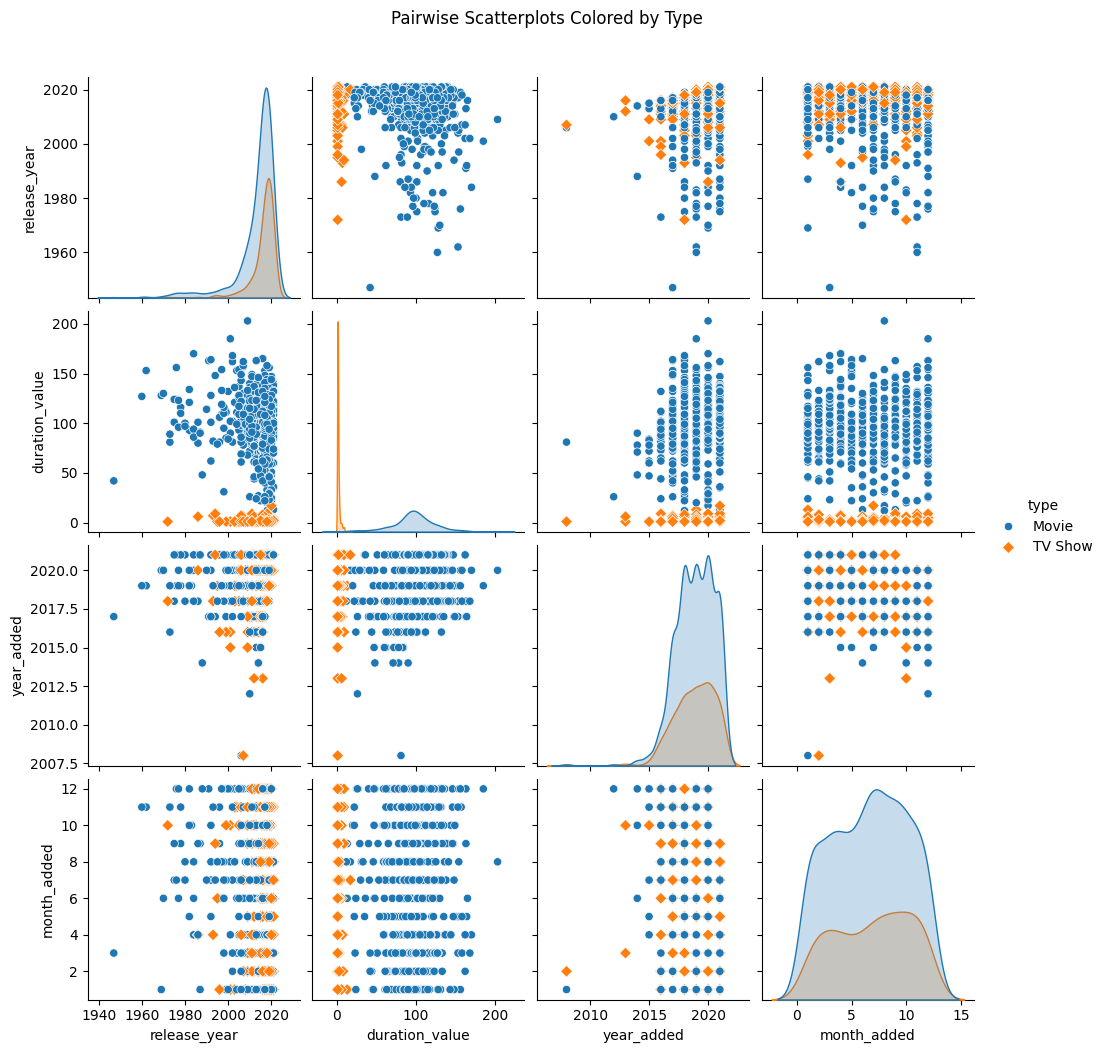

In [99]:
num_cols = ['release_year', 'duration_value', 'year_added', 'month_added']
df_type = df[num_cols + ['type']]

sns.pairplot(df_type.sample(1000), hue='type', diag_kind='kde', markers=["o",'D'])
plt.suptitle("Pairwise Scatterplots Colored by Type", y=1.05)
plt.show()

### 11. Summary of Key Insights

-  **Movies dominate** the Netflix catalog at around 70%.
- **Most content was released between 2010–2020**.
- **Top countries** are United States, India, UK.
- **TV-MA** is the most common rating.
- **Movie durations** mostly fall between 60–120 minutes.
- **TV shows typically have 1–3 seasons**.
- **Top genres** include Dramas, International Movies, and Comedies.
